In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [2]:
## read the data file

df = pd.read_csv('/content/heart.csv')

In [3]:
## display first five row of data

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


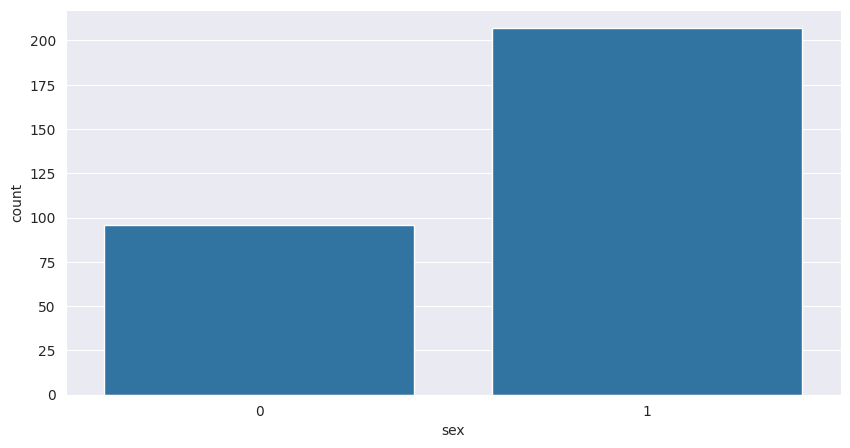

In [4]:
## value counts of column age

plt.figure(figsize=(10, 5))
sns.countplot(x='sex', data=df);

<Figure size 1000x1000 with 0 Axes>

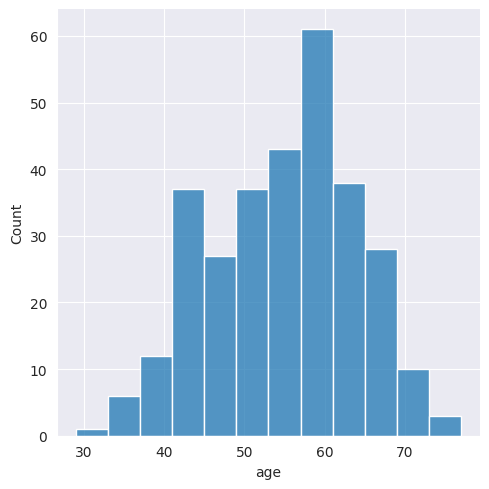

In [5]:
## distribution plot of column age

plt.figure(figsize=(10, 10));
sns.displot(df['age']);

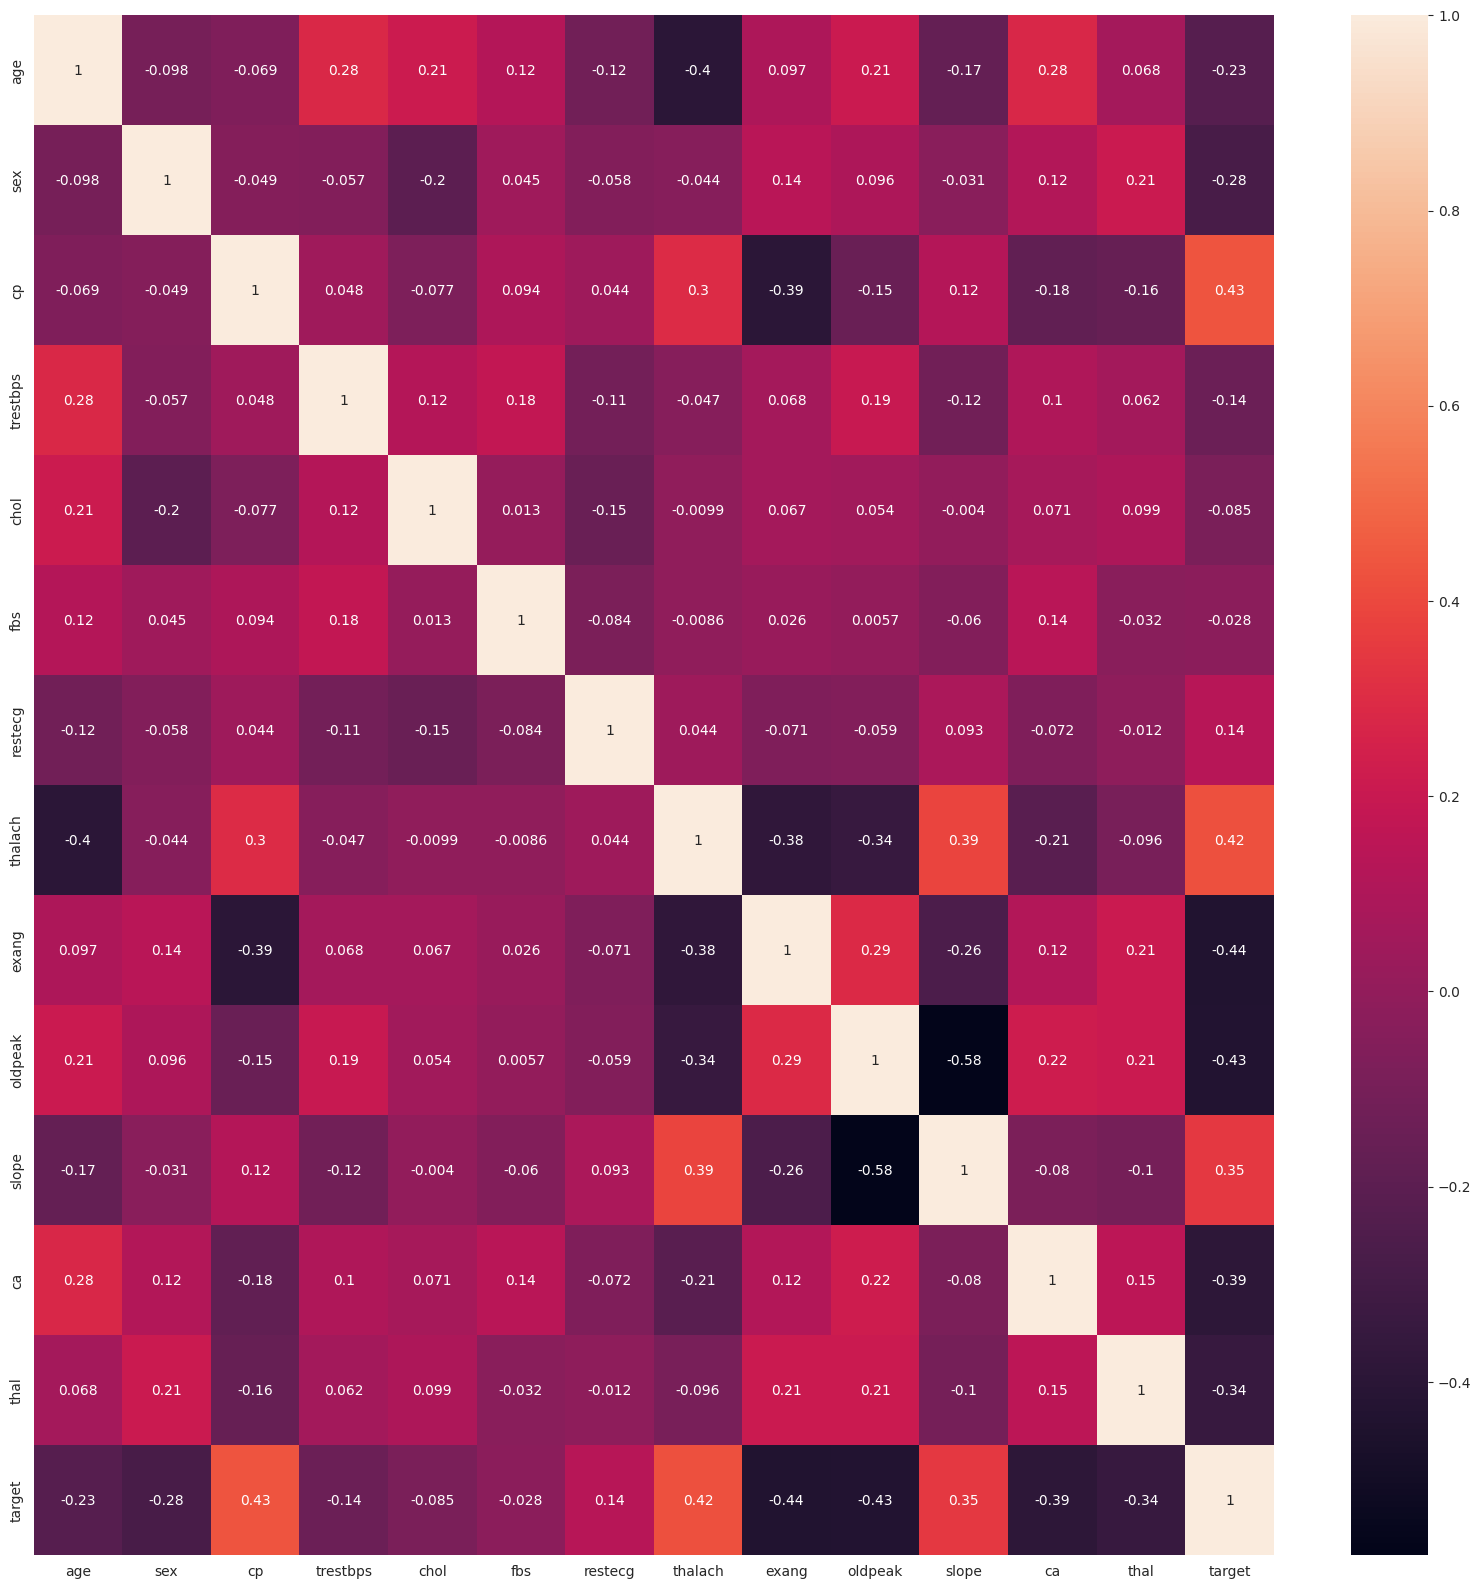

In [6]:
## correlation of features

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True);

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


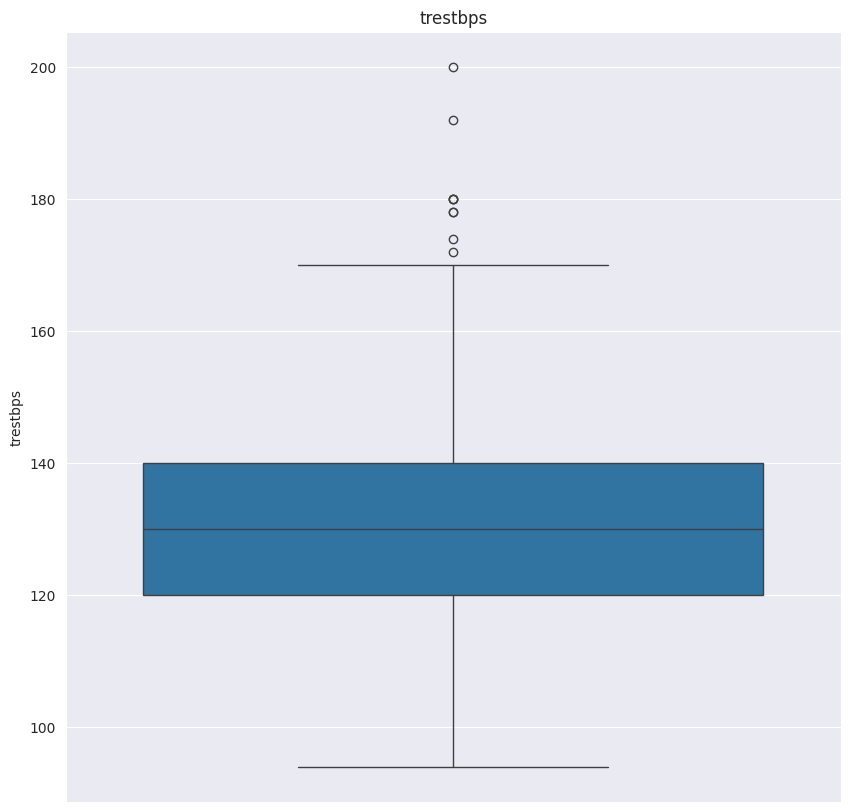

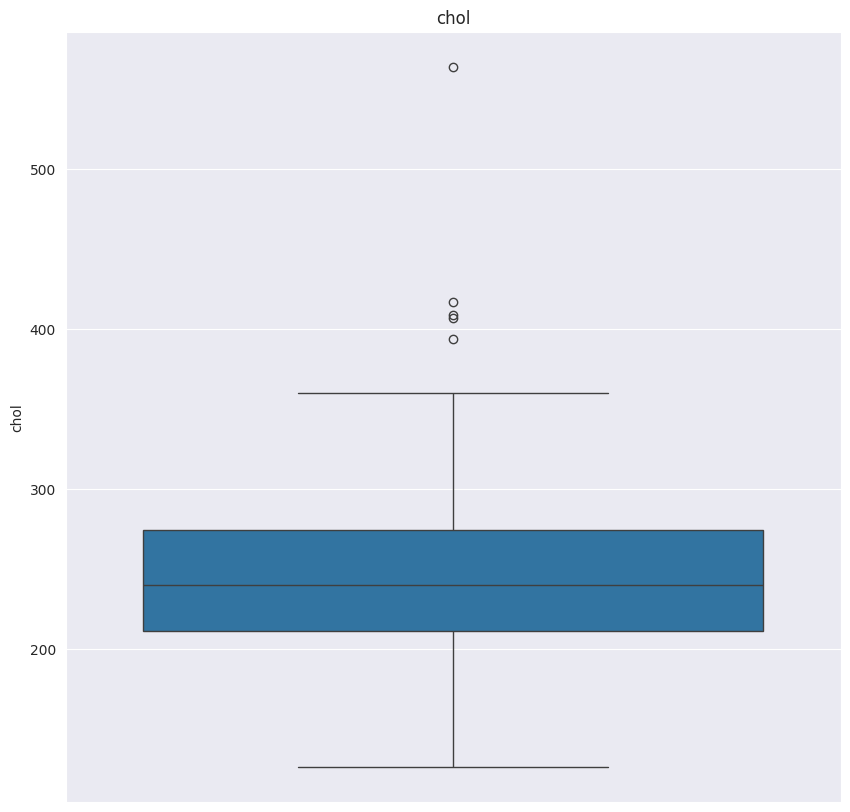

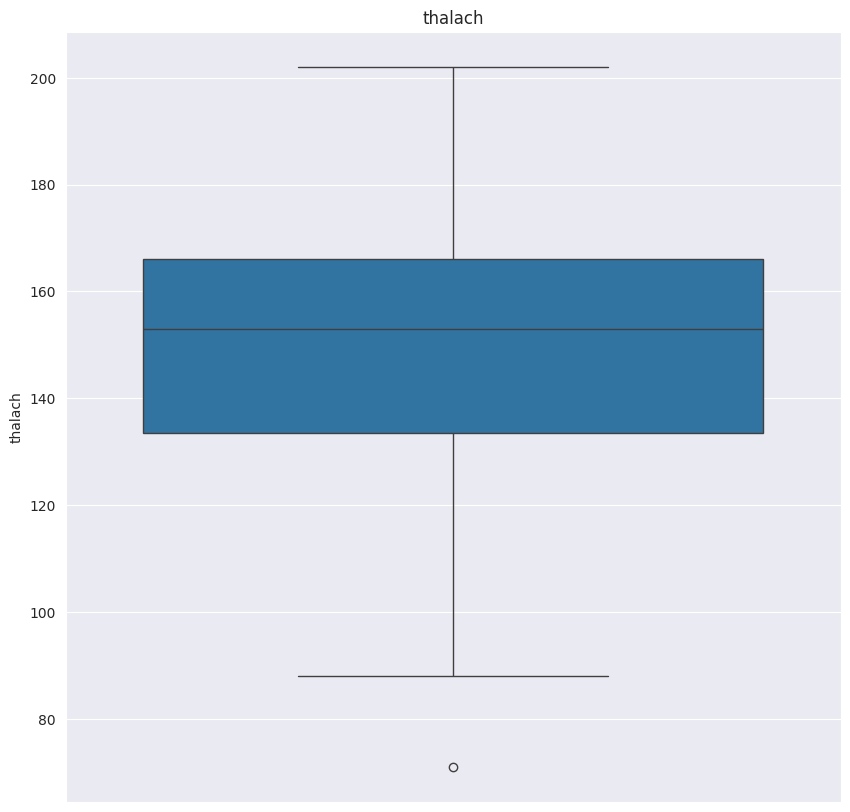

In [8]:
## checking outliers

for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[f])
    plt.title(f)

<Figure size 1000x1000 with 0 Axes>

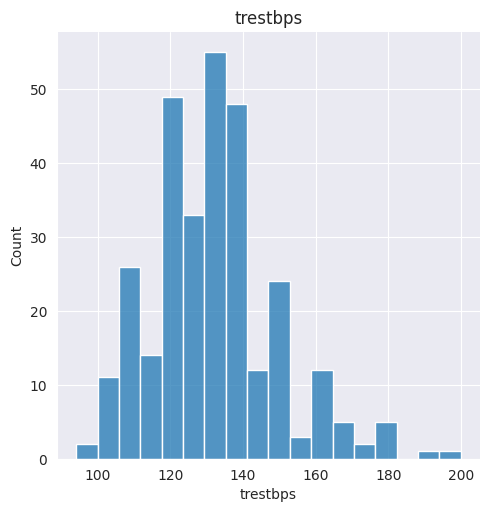

<Figure size 1000x1000 with 0 Axes>

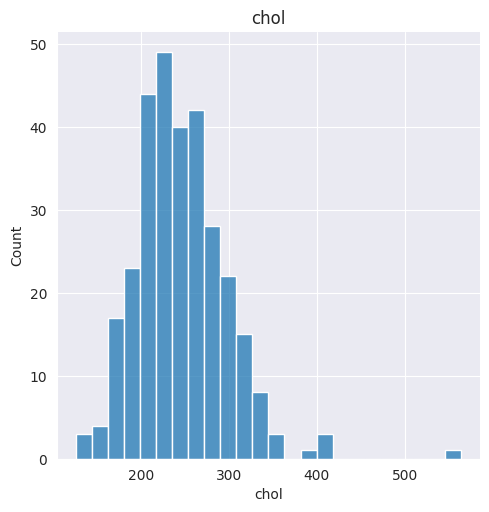

<Figure size 1000x1000 with 0 Axes>

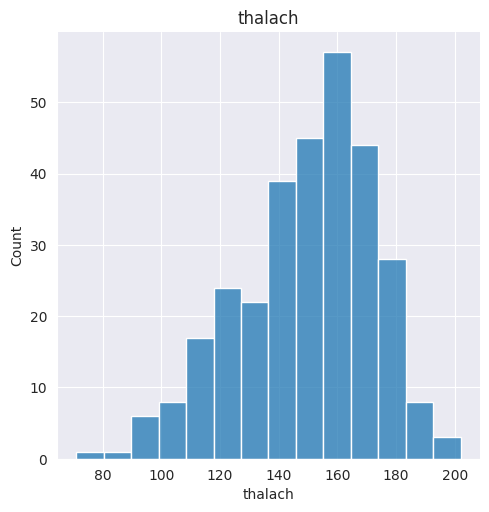

In [9]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.displot(df[f])
    plt.title(f)

In [10]:
## most of the columns are following gaussian distribution, so we are going to remove outliers with 3rd std

def remove_outliers(df, feature):
    lower_bound = df[feature].mean() - (3 * df[feature].std())
    upper_bound = df[feature].mean() + (3 * df[feature].std())

    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [11]:
for f in ['trestbps', 'chol', 'thalach', 'age']:
    remove_outliers(df, f)

/tmp/ipython-input-10-4152397341.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.00933393568636' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound
/tmp/ipython-input-10-4152397341.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '90.77177343885015' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound
/tmp/ipython-input-10-4152397341.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80.9313813417264' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound
/t

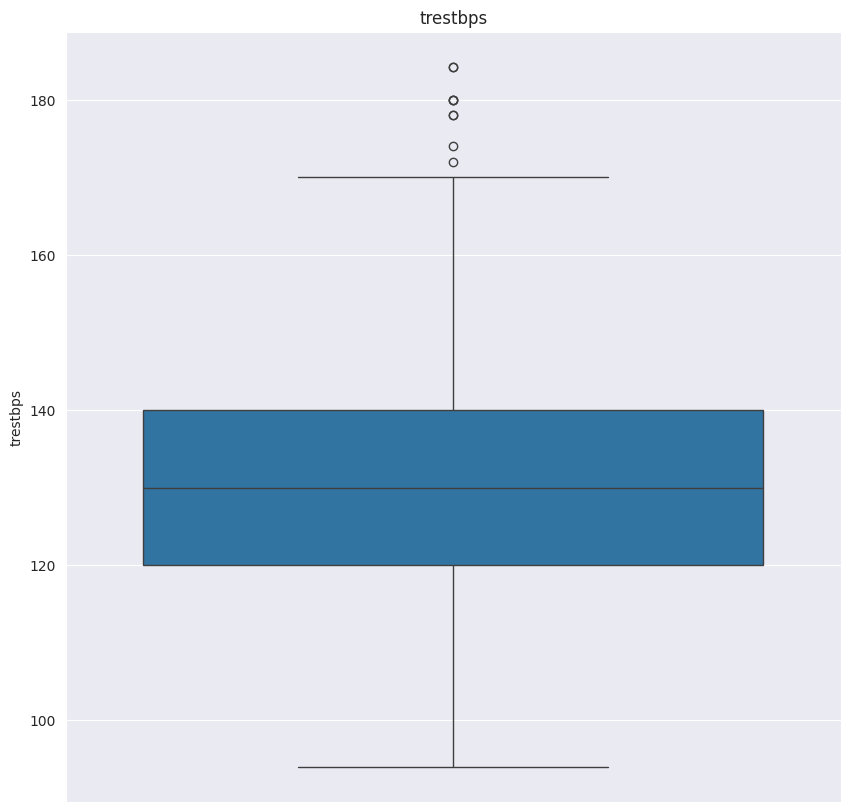

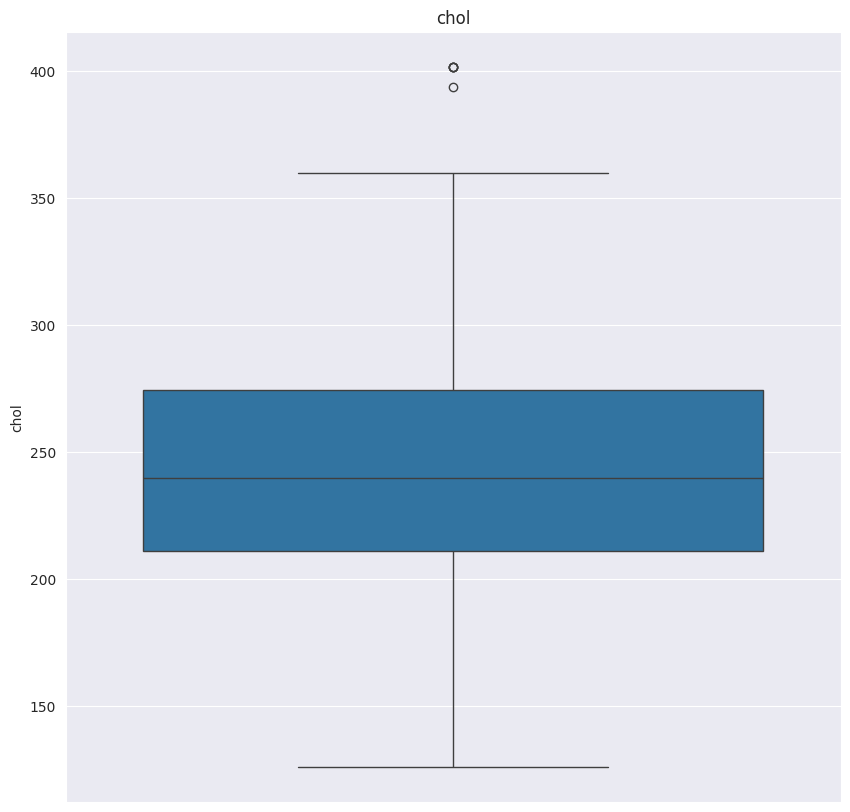

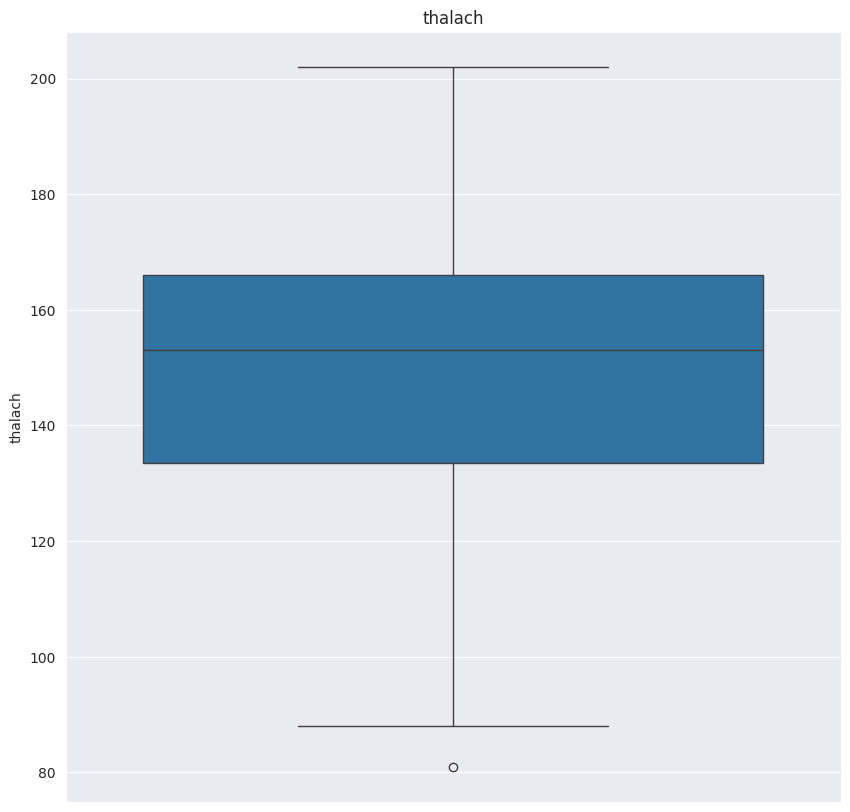

In [12]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[f])
    plt.title(f)

In [13]:
remove_outliers(df, 'age')

In [14]:
## dependent and independent features

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## converting X and y into numpy array's

X = X.values
y = y.values

In [15]:
## scaling the data

sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
## splitting the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
## logistic Regression

lg = LogisticRegression()

In [18]:
lg.fit(X_train, y_train)

LogisticRegression()

In [19]:
preds = lg.predict(X_test)
pd.DataFrame({'Acutual': y_test, 'Predicted': preds})

,Acutual,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
71,1,1
72,0,1
73,1,1
74,0,0


------------------------------------------------Accuracy Score-------------------------------------------------------
84.21052631578947
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


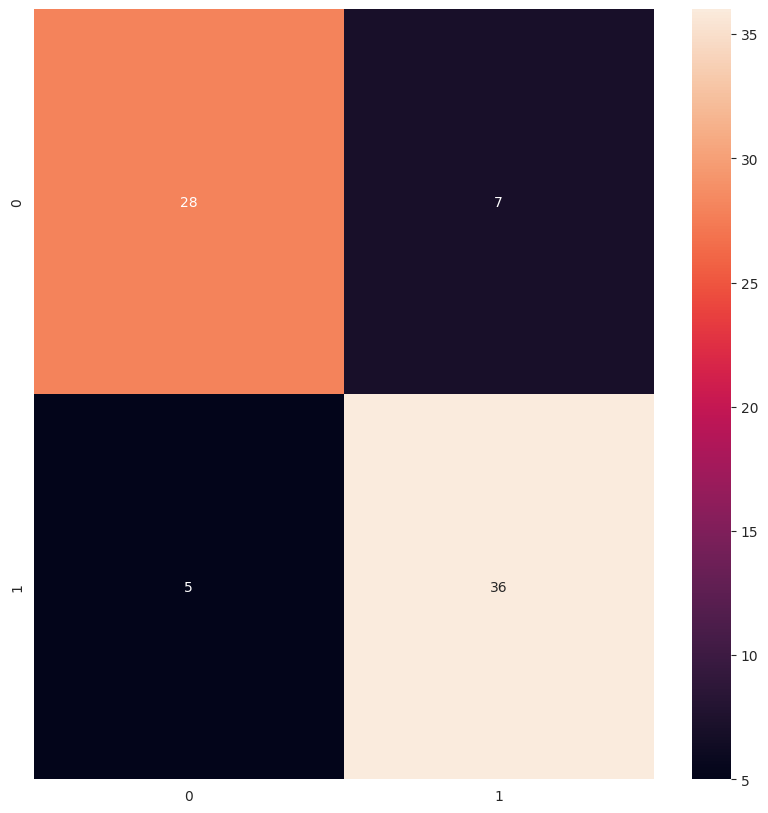

In [21]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print((accuracy_score(y_test, preds))*100)

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, preds))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, preds), annot=True);